In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
## Load Data

df_2019 = pd.read_csv('data/fantasy_data_2019.csv')
df_2020 = pd.read_csv('data/fantasy_data_2020.csv')
df_2021 = pd.read_csv('data/fantasy_data_2021.csv')
df_2022 = pd.read_csv('data/fantasy_data_2022.csv')
df_2023 = pd.read_csv('data/fantasy_data_2023.csv')

In [3]:
## Define and assign Fantasy points

## Calculates Fantasy points for each player in a dataframe
def fantasy_points(df):
  all_points = []
  for i,row in df.iterrows():
    player_points = 0
    player_points += 0.1 * (row['rush_yds'] + row['rec_yds'])
    player_points += 6 * (row['rush_td'] + row['rec_td'])
    player_points += (1/25) * row['pass_yds']
    player_points += (4) * row['pass_td']
    player_points += (-2) * row['int']
    player_points += (-2) * row['fumbles']
    all_points.append(player_points)
  return all_points

df_list = [df_2019, df_2020, df_2021, df_2022, df_2023]
for df in df_list:
  df['fantasy_pts'] = fantasy_points(df)


for i,df in enumerate(df_list):
  if i == 4:
    break
  temp = df_list[i+1].rename(columns = {'fantasy_pts': 'next_yr_pts'})
  df_list[i] = pd.merge(df, temp[['name', 'position', 'next_yr_pts']], on=['name', 'position'], how='inner')

df_2019 = df_list[0]
print(df_2019.columns)
df_2020 = df_list[1]
df_2021 = df_list[2]
df_2022 = df_list[3]

Index(['name', 'position', 'team_pts', 'opp_pts', 'cmp', 'att', 'pass_yds',
       'pass_td', 'int', 'rating', 'sacked', 'rush_att', 'rush_yds', 'rush_td',
       'tgt', 'rec_yds', 'rec_td', 'snap_pct', 'rec', 'age', 'fumbles',
       'games_played', 'yards_per_attempt_qb', 'yards_per_attempt_rb',
       'yards_per_reception_wr', 'fantasy_pts', 'next_yr_pts'],
      dtype='object')


In [4]:
df_full = pd.concat([df_2019, df_2020, df_2021, df_2022], ignore_index=True,axis=0)

In [18]:
df_full.columns
df_full['position'].unique()

array(['RB', 'WR', 'QB', 'TE'], dtype=object)

In [13]:
df_encoded = pd.get_dummies(df_full, columns=['position'], drop_first=False)

# Define features and target
X = df_encoded.drop(columns=['name', 'fantasy_pts', 'next_yr_pts'])
X.fillna(0, inplace = True) 
y = df_encoded['next_yr_pts']

X.fillna(0, inplace=True)

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Train the linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared score:', r2_score(y_test, y_pred))

# Train the Lasso model
## May want to mess w/ alpha value
lasso = Lasso(alpha = 0.5)
lasso.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred_2 = lasso.predict(X_test)

print(f'params {lasso.coef_ }')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_2)))
print('R-squared score:', r2_score(y_test, y_pred_2))

RMSE: 62.89903263129572
R-squared score: 0.4055410925099605
params [-9.29182400e-03 -1.09959296e-01 -1.36802432e+00  1.37341300e+00
 -4.68654675e-02  2.61913346e+00 -5.32206187e+00 -1.22497523e+00
 -2.24814751e-01 -2.18974130e-01  1.05281410e-01  2.06300003e+00
 -1.14575730e-02  7.10015811e-02  2.02382176e+00  0.00000000e+00
  1.33408829e-01 -4.57562833e-01  2.10777009e+00 -4.48180118e-01
  3.30858051e+01  3.46322609e+00 -5.36402466e-02  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00]
RMSE: 61.72691204679361
R-squared score: 0.4274900886922466


/Users/willhoff/miniforge3/envs/ffenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.467e+05, tolerance: 2.793e+02
  model = cd_fast.enet_coordinate_descent(


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END .........................alpha=0.001, max_iter=1000; total time=   0.0s
[CV] END .........................alpha=0.001, max_iter=1000; total time=   0.0s
[CV] END .........................alpha=0.001, max_iter=1000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=1000; total time=   0.0s
[CV] END .........................alpha=0.001, max_iter=5000; total time=   0.1s
[CV] END ..........................alpha=0.01, max_iter=1000; total time=   0.0s
[CV] END .........................alpha=0.001, max_iter=5000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=1000; total time=   0.0s
[CV] END .........................alpha=0.001, max_iter=5000; total time=   0.1s
[CV] END ..........................alpha=0.01, max_iter=5000; total time=   0.0s
[CV] END ...........................alpha=0.1, max_iter=1000; total time=   0.0s
[CV] END ........................alpha=0.001, ma

/Users/willhoff/miniforge3/envs/ffenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.441e+05, tolerance: 2.025e+02
  model = cd_fast.enet_coordinate_descent(
/Users/willhoff/miniforge3/envs/ffenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.946e+05, tolerance: 1.615e+02
  model = cd_fast.enet_coordinate_descent(
/Users/willhoff/miniforge3/envs/ffenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

[CV] END .........................alpha=0.01, max_iter=10000; total time=   0.1s
[CV] END ............................alpha=10, max_iter=1000; total time=   0.0s
[CV] END ............................alpha=10, max_iter=1000; total time=   0.0s
[CV] END .............................alpha=1, max_iter=5000; total time=   0.0s
[CV] END .........................alpha=0.01, max_iter=10000; total time=   0.1s
[CV] END ...........................alpha=0.1, max_iter=5000; total time=   0.1s
[CV] END ............................alpha=10, max_iter=5000; total time=   0.0s
[CV] END ............................alpha=10, max_iter=5000; total time=   0.0s
[CV] END ..........................alpha=0.1, max_iter=10000; total time=   0.1s
[CV] END .............................alpha=1, max_iter=5000; total time=   0.0s
[CV] END ............................alpha=1, max_iter=10000; total time=   0.0s
[CV] END .............................alpha=1, max_iter=1000; total time=   0.0s
[CV] END ...................

/Users/willhoff/miniforge3/envs/ffenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.796e+05, tolerance: 1.935e+02
  model = cd_fast.enet_coordinate_descent(
/Users/willhoff/miniforge3/envs/ffenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.314e+02, tolerance: 2.025e+02
  model = cd_fast.enet_coordinate_descent(
/Users/willhoff/miniforge3/envs/ffenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

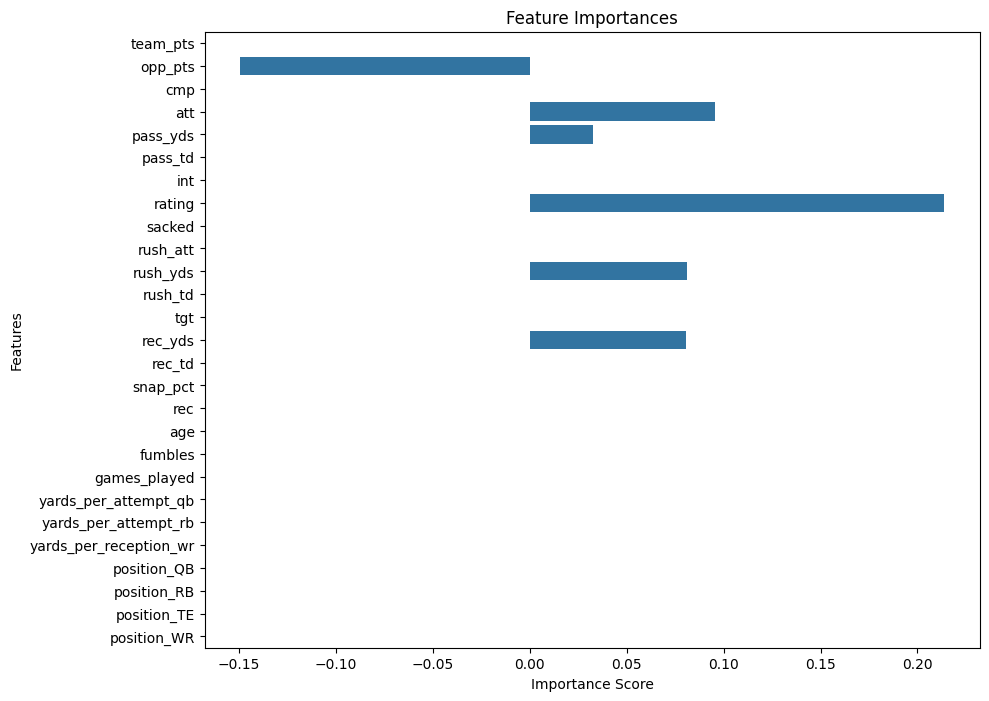

Best Parameters: {'alpha': 100, 'max_iter': 1000}
RMSE: 58.8826782615165


In [16]:


def process_and_model(df):
    # One-hot encode the 'position' column
    df_encoded = pd.get_dummies(df, columns=['position'], drop_first=False)
    
    # Define features and target
    X = df_encoded.drop(columns=['name', 'fantasy_pts', 'next_yr_pts'])
    X.fillna(0, inplace = True) 
    y = df_encoded['next_yr_pts']
    
    # Define the parameter grid for grid search
    param_grid = {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [1000, 5000, 10000]
    }
    
    # Initialize the model
    lasso = Lasso(random_state=42)
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
    
    # Fit the grid search
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator
    best_lasso = grid_search.best_estimator_
    
    # Predict on test data
    y_pred = best_lasso.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'RMSE: {rmse}')
    
    # Feature importance
    feature_importances = pd.Series(best_lasso.coef_, index=X_train.columns)
    
    # Plot variable importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x=feature_importances, y=feature_importances.index)
    plt.title('Feature Importances')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()
    
    return best_lasso, grid_search.best_params_, rmse

# Assuming df is already defined as your DataFrame
lasso_mod, best_params, rmse = process_and_model(df_full)
print(f'Best Parameters: {best_params}')
print(f'RMSE: {rmse}')

In [17]:
df_encoded = pd.get_dummies(df_2023, columns=['position'], drop_first=False)
X = df_encoded.drop(columns=['name', 'fantasy_pts'])
X.fillna(0, inplace = True)
y_pred = lasso_mod.predict(X) 
results = pd.DataFrame({'name': df_2023['name'], 'position': df_2023['position'], 'preds': y_pred})

results.to_csv("2023_lasso_preds.csv")





